[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


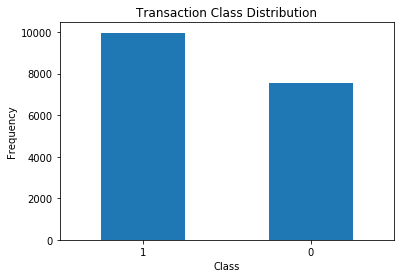

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 

traindata=pd.read_csv("E:\\assignment\\ass 19 nlp rec\\train.csv")

traindata.tail()

game=pd.read_csv("E:\\assignment\\ass 19 nlp rec\\game_overview.csv")

game.head()

data=traindata.merge(game, on='title')

data.head()

data.isnull().any()

#checking balance or not
count = pd.value_counts(data['user_suggestion'], sort = True)
count.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

test=pd.read_csv("E:\\assignment\\ass 19 nlp rec\\test.csv")

test.head()

fdata=data.append(test,sort=False)

fdata.reset_index(inplace=True)

fdata.tail()

import re
import nltk
nltk.download('stopwords') #contain irrelvant words  & ava in diff lang
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] #corpus collection of strings
for i in range(0,25539):
    review = re.sub('[^a-zA-Z]', ' ', str(fdata['user_review'][i])) #remove  except a-z & A-Z & create space b/w words
    review = review.lower() #capital to lower
    review = review.split()  #sentence to words
    ps = PorterStemmer()  # loved to love (diff kind of same word into standard word)
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #take words not in stopward
    review = ' '.join(review) #again to string sep by space
    corpus.append(review)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000)
X = cv.fit_transform(corpus).toarray()

X_train=X[0:17494]
X_test=X[17494:]

y_train=traindata['user_suggestion']
           

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 5000, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 10000))
classifier.add(Dropout(0.4))
# Adding the second hidden layer
classifier.add(Dense(units = 5000, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(0.4))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



classifier.fit(X_train, y_train, batch_size = 128, epochs = 2)

y_pred = classifier.predict(X_test)
y_pred = np.concatenate(y_pred)
res=[]
y=0.5
for i in y_pred :
    if  i>0.5:
         res.append(1)
    else:
         res.append(0)
results = np.array(res)


Epoch 1/2
17494/17494 [==============================] - 142s 8ms/step - loss: 0.4239 - acc: 0.8263
Epoch 2/2
17494/17494 [==============================] - 139s 8ms/step - loss: 0.2193 - acc: 0.9192


In [13]:

results = pd.Series(results,name="pred")

submission = pd.concat([pd.Series(range(1,36001),name = "ImageId"),results],axis = 1)

submission.to_csv("ann 1 e-0.4 10000 5000 e=2 0.4.csv",index=False)